VARIABLE CREATION:
In this segment of the code, variables are created by assigning dummy values to them, 
which are not used in the simulation. This step is necessary in R.

In [15]:
endcd = 0

s_endc = 0
s_r = 0

ti_r = 0
ti_f = 0

o_r = 0
psr = 0

io_f = 0

ei_r = 0
ei_f = 0

sl_r = 0
sl_f = 0

sla_r = 0
sla_f = 0

ia_r = 0
ia_f = 0


PARAMETERS AND INITAL VALUES OF THE MATHEMATICAL MODEL:
In order to ease the comparison of the mathematical
model and the R code, the equation numbers are also
provided in the R code. For example #1, #2, #3, and so
on and so forth.

In [16]:
sat_r = 2 #1 This is 1/alpha
sat_f = 2 #1 This is 1/alpha

mdt_r = 1 #2

st_f = 2 #3

plt = 2 #4

wsl_r = .5  #5 This is Beta
wsl_f = .5  #5 This is Beta

theta_r = .5 #6 This is Theta
theta_f = .5  #6 This is Theta

In R, an index of zero cannot be used in an array. For
example, the first element of an array of variable x,
is represented as x[1]. Therefore, t in R corresponds
to t-1 in the mathematical model.  

In [17]:

for(t in 2:5){ #7 (corresponds to t = 1 to 4
  endcd[t] = 15 #  in the mathematical model) #Customer Demand
}

for(t in 6:200){ #7 (corresponds to t = 5 to 36 # Change to number of weeks needed
  endcd[t] = 15 #  in the mathematical model) #Customer Demand
}

eecd = 4 #8
eo_r = 4 #9

di_r = 0 #10
di_f = 0 #10

dsl_r = eecd * (mdt_r + st_f) #11
dsl_f = eo_r * plt #14

b_r = 0 #15
b_f = 0 #15

i_r = 0 #16 Initial Inventory retailer
i_f = 0 #16 Initial Inventory factory

iti1_r = 4 #17

wipi1 = 4 #18

iti2_r = 4 #19

wipi2 = 4 #20

o_r[2] = 4 #21

psr[2] = 4 #22

io_f[2] = 4 #23

tc_r = 0 #24
tc_f = 0 #24

uihc = 0.5 #25  ###
ubc = 1 #26   ##

s_prime_r = 28 #(Decision Parameter) ##
s_prime_f = 20 #(Decision Parameter) ##


START OF THE SIMULATION-FOR-LOOP

In [18]:
for(t in 2:200) # (corresponds to t = 1 to 36,  # Change to number of weeks needed
{ # in the mathematical model)
  
  #####Step 1#####
  
  ti_r[t] = i_r[t-1] + iti2_r[t-1] #25
  
  ti_f[t] = i_f[t-1] + wipi2[t-1] #26
  
  iti2_r[t] = iti1_r[t-1] #27
  
  wipi2[t] = wipi1[t-1] #28
  
  iti1_r[t] = 0 #29
  
  wipi1[t] = 0 #30
  
  #####Step 2#####
  
  s_endc[t] = min(ti_r[t], b_r[t-1] + endcd[t]) #31
  s_r[t] = min(ti_f[t], b_f[t-1] + io_f[t]) #32
  
  iti1_r[t] = s_r[t] #35
  
  wipi1[t] = psr[t] #36
  
  #####Step 3#####
  
  b_r[t] = b_r[t-1] + endcd[t] - s_endc[t] #37
  b_f[t] = b_f[t-1] + io_f[t] - s_r[t] #40
  
  i_r[t] = ti_r[t] - s_endc[t] #41
  i_f[t] = ti_f[t] - s_r[t] #44
  
  #####Expectation Formation#####
  
  eecd[t] = eecd[t-1] + theta_r * (endcd[t] - eecd[t-1]) #45 
  eo_r[t] = eo_r[t-1] + theta_f * (io_f[t] - eo_r[t-1]) #46
  
  #####Step 4#####
  
  io_f[t+1] = o_r[t] #51
  
  #####Step 5#####
  
  dsl_r[t] = eecd[t] * (mdt_r + st_f) #52
  dsl_f[t] = eo_r[t] * plt #55
  
  ei_r[t] = i_r[t] - b_r[t] #56
  ei_f[t] = i_f[t] - b_f[t] #56
  
  sl_r[t] = io_f[t+1] + b_f[t] + iti1_r[t] + iti2_r[t] #57
  sl_f[t] = wipi1[t] + wipi2[t] #60
  
  sla_r[t] = wsl_r * (dsl_r[t] - sl_r[t]) / sat_r #61
  sla_f[t] = wsl_f * (dsl_f[t] - sl_f[t]) / sat_f #61
  
  ia_r[t] = (di_r - ei_r[t]) / sat_r #62
  ia_f[t] = (di_f - ei_f[t]) / sat_f #62
  
  if(t <= 5) # (corresponds to t <= 4
  { #  in the mathematical model)
    o_r[t+1] = 4 #63
    psr[t+1] = 4 #66
  }
  else
  {
    o_r[t+1]=floor(max(eecd[t]+ia_r[t]+sla_r[t],0)+0.5)	#63
    psr[t+1]=floor(max(eo_r[t]+ia_f[t]+sla_f[t],0)+0.5)	#66
  }
  
  # In the mathematical model, we assume that the values are
  # rounded using the "round half way from zero" tie-breaking
  # rule. However, the function "round" in R uses the "round
  # half alternatingly" rule. After adding 0.5 to the values
  # to be rounded, the "floor" function confirms to our assumed
  # tie-breaking rule only in the presence of non-negative
  # orders, which is guaranteed by the "max" function.
  
  tc_r[t] = tc_r[t-1] + (b_r[t] + 0.5 * i_r[t]) #67
  tc_f[t] = tc_f[t-1] + (b_f[t] + 0.5 * i_f[t]) #67
}

# END OF THE SIMULATION-FOR-LOOP


TOTAL COSTS OBTAINED AT EACH ECHELON ARE REPORTED:
The below cost values correspond to the costs obtained
at the end of the game.

In [20]:
tc_r[200] # Change to number of weeks needed (retailer)
tc_f[200] # Change to number of weeks needed (factory)


[1] 1411.5

[1] 1312

THE TEAM TOTAL COST IS CALCULATED AND REPORTED 

In [21]:
ttc = tc_r[200] + tc_f[200] # Change to number of weeks needed
ttc

[1] 2723.5

Here we plot the inventory dynamics for this simulation:

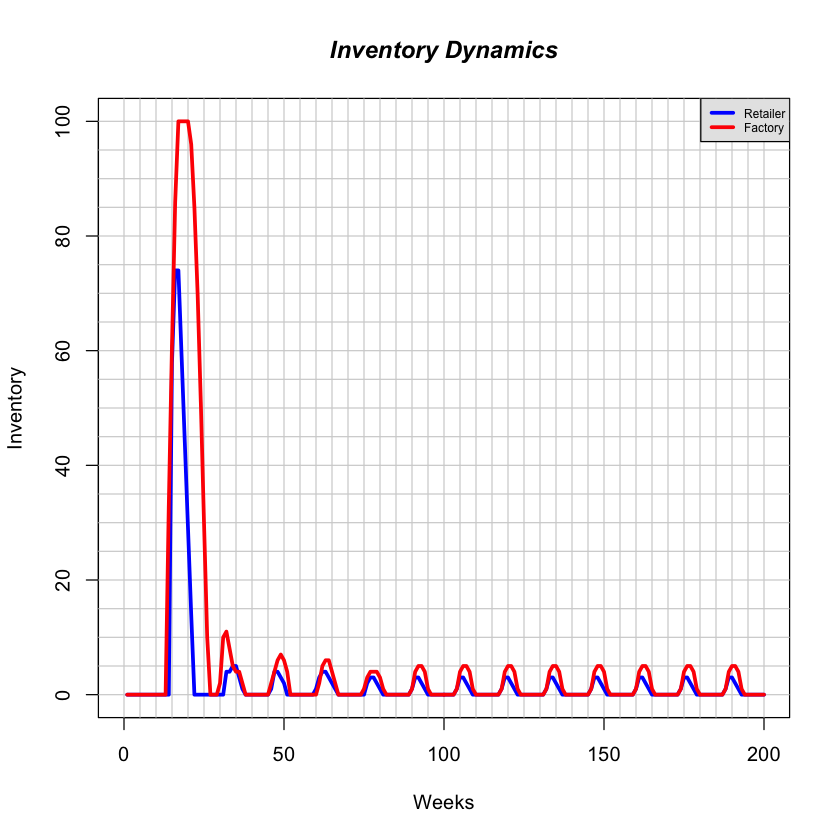

In [23]:
g_range = range(0, i_r, i_f)

plot(0,ann=FALSE,type="n",xlim=c(0,200),ylim=g_range) # Change to number of weeks needed

abline(v=(seq(0,200,5)), col="lightgray", lty=1) # Change to number of weeks needed
abline(h=(seq(0,g_range[2],5)), col="lightgray", lty=1)


lines(i_r, type="l", lty=1, col="blue", lwd=3)


lines(i_f, type="l", lty=1, col="red", lwd=3)

legend("topright", legend=c("Retailer", "Factory"), cex=0.6, col=c("blue","red"), lty=c(1,1), lwd=c(3,3), bty="l", bg="gray90");

title(main="Inventory Dynamics", col.main="black", font.main=4)

title(xlab="Weeks")
title(ylab="Inventory")